In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import f_oneway

# Load Dataset

In [53]:
# Load datasets
trades_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')

# Cleaning and Merging Dataset

In [54]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
# Check for nulls
print(trades_df.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [56]:
trades_df['Timestamp'] = trades_df['Timestamp'].astype('int64')

In [62]:
# Convert timestamps to datetime
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'], unit='ms')

In [63]:
trades_df['Timestamp']

,Timestamp
0,2024-10-27 03:33:20
1,2024-10-27 03:33:20
2,2024-10-27 03:33:20
3,2024-10-27 03:33:20
4,2024-10-27 03:33:20
...,...
211219,2025-06-15 15:06:40
211220,2025-06-15 15:06:40
211221,2025-06-15 15:06:40
211222,2025-06-15 15:06:40


In [64]:
# Create date columns for merging
trades_df['date'] = trades_df['Timestamp'].dt.date

In [70]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27


In [71]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-18
1,1517549400,15,Extreme Fear,02-02-18
2,1517635800,40,Fear,03-02-18
3,1517722200,24,Extreme Fear,04-02-18
4,1517808600,11,Extreme Fear,05-02-18


In [72]:
# Convert timestamps to datetime
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'])

In [73]:
sentiment_df['timestamp']

,timestamp
0,1970-01-01 00:00:01.517463000
1,1970-01-01 00:00:01.517549400
2,1970-01-01 00:00:01.517635800
3,1970-01-01 00:00:01.517722200
4,1970-01-01 00:00:01.517808600
...,...
2639,1970-01-01 00:00:01.745818200
2640,1970-01-01 00:00:01.745904600
2641,1970-01-01 00:00:01.745991000
2642,1970-01-01 00:00:01.746077400


In [74]:
# Create date columns for merging
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

/tmp/ipython-input-74-2738516423.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [75]:
sentiment_df.head()

,timestamp,value,classification,date
0,1970-01-01 00:00:01.517463000,30,Fear,2018-01-02
1,1970-01-01 00:00:01.517549400,15,Extreme Fear,2018-02-02
2,1970-01-01 00:00:01.517635800,40,Fear,2018-03-02
3,1970-01-01 00:00:01.517722200,24,Extreme Fear,2018-04-02
4,1970-01-01 00:00:01.517808600,11,Extreme Fear,2018-05-02


In [76]:
# Check for nulls
print(sentiment_df.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [77]:
# Merge datasets using inner join on date
merged_df = pd.merge(trades_df, sentiment_df[['date', 'classification', 'value']], on='date', how='inner')

In [79]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed,74
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed,74
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed,74
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed,74
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed,74


# Exploratory Data Analysis (EDA)

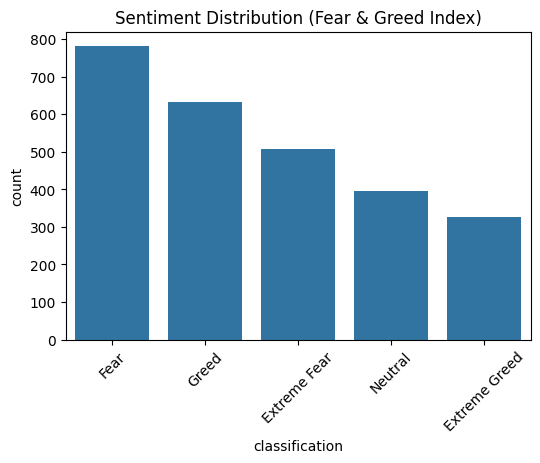

In [83]:
# Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=sentiment_df, x='classification', order=sentiment_df['classification'].value_counts().index)
plt.title("Sentiment Distribution (Fear & Greed Index)")
plt.xticks(rotation=45)
plt.show()

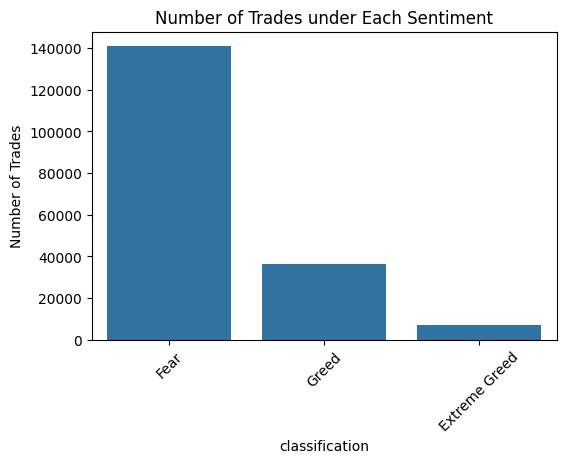

In [84]:
# Trade Volume vs Sentiment
plt.figure(figsize=(6,4))
trade_counts = merged_df.groupby('classification').size().reset_index(name='Number of Trades')
sns.barplot(data=trade_counts, x='classification', y='Number of Trades', order=trade_counts.sort_values(by='Number of Trades', ascending=False)['classification'])
plt.title("Number of Trades Under Each Sentiment")
plt.xticks(rotation=45)
plt.show()

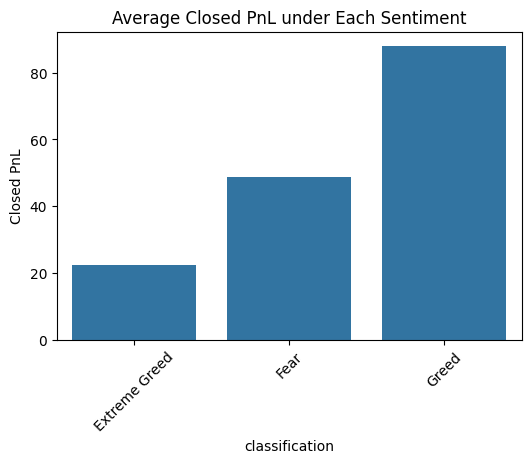

In [87]:
# Average Closed PnL vs Sentiment
plt.figure(figsize=(6,4))
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()
sns.barplot(data=avg_pnl, x='classification', y='Closed PnL')
plt.title("Average Closed PnL under Each Sentiment")
plt.xticks(rotation=45)
plt.show()

<Figure size 600x400 with 0 Axes>

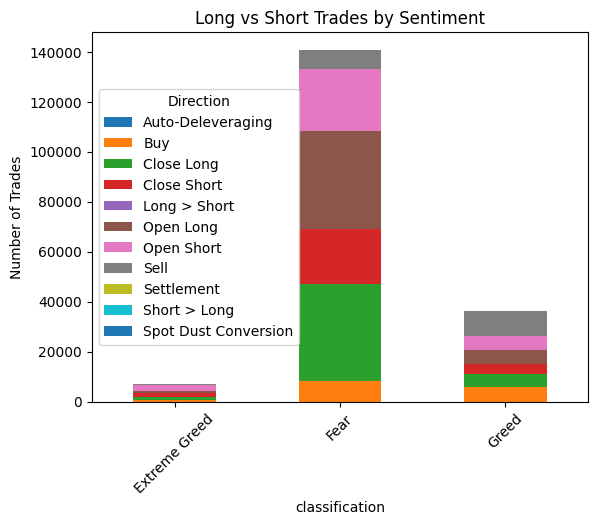

In [88]:
# Directional Bias (Long/Short) by Sentiment
plt.figure(figsize=(6,4))
dir_counts = merged_df.groupby(['classification', 'Direction']).size().unstack().fillna(0)
dir_counts.plot(kind='bar', stacked=True)
plt.title("Long vs Short Trades by Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.show()

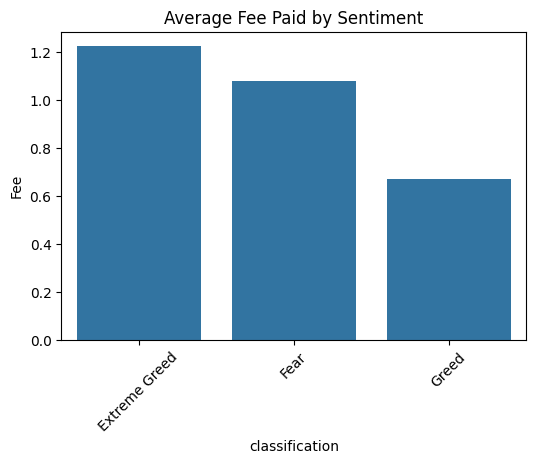

In [92]:
# Fee Paid vs Sentiment
plt.figure(figsize=(6, 4))
fee_avg = merged_df.groupby('classification')['Fee'].mean().reset_index()
sns.barplot(data=fee_avg, x='classification', y='Fee')
plt.title("Average Fee Paid by Sentiment")
plt.xticks(rotation=45)
plt.show()

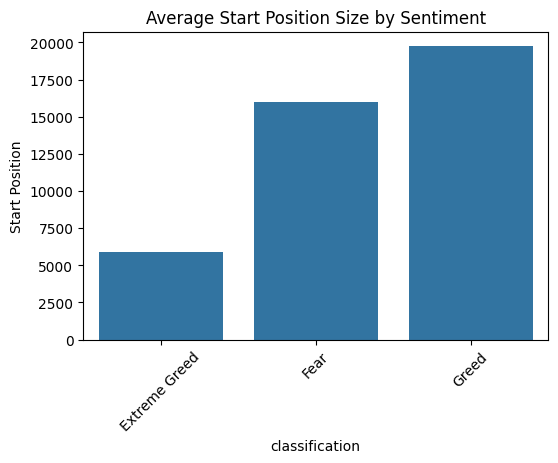

In [94]:
# Start Position Size vs Sentiment
plt.figure(figsize=(6, 4))
pos_avg = merged_df.groupby('classification')['Start Position'].mean().reset_index()
sns.barplot(data=pos_avg, x='classification', y='Start Position')
plt.title("Average Start Position Size by Sentiment")
plt.xticks(rotation=45)
plt.show()

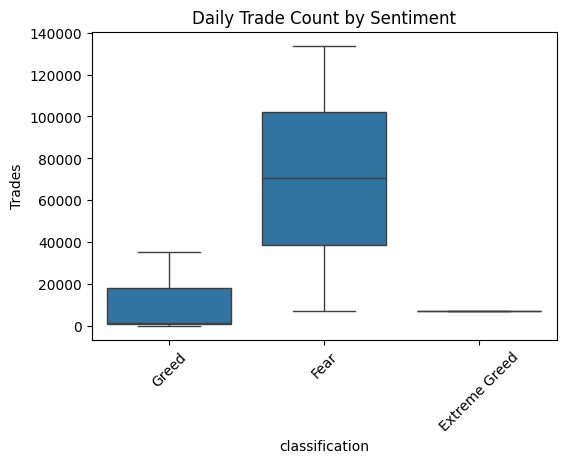

In [96]:
# Number of Trades per Day vs Sentiment
plt.figure(figsize=(6, 4))
daily_trades = merged_df.groupby(['date', 'classification']).size().reset_index(name='Trades')
sns.boxplot(data=daily_trades, x='classification', y='Trades')
plt.title("Daily Trade Count by Sentiment")
plt.xticks(rotation=45)
plt.show()

Statistical Analysis

In [100]:
# Prepare data for ANOVA
groups = [group["Closed PnL"].dropna().values for name, group in merged_df.groupby("classification")]

In [101]:
# Perform ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-Statistic: {f_stat:.4f}, P-Value: {p_val:.4f}")

ANOVA F-Statistic: 29.7124, P-Value: 0.0000


In [102]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's test to check the significant
tukey = pairwise_tukeyhsd(endog=merged_df['Closed PnL'],
                          groups=merged_df['classification'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
    group1    group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
Extreme Greed   Fear  26.6004 0.0506 -0.0579 53.2587  False
Extreme Greed  Greed  65.6651    0.0  37.214 94.1163   True
         Fear  Greed  39.0648    0.0 26.1267 52.0028   True
-----------------------------------------------------------


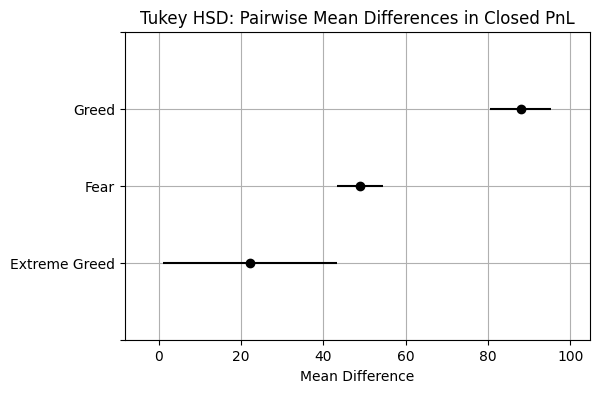

In [104]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
fig = tukey.plot_simultaneous(figsize=(6, 4))
plt.title("Tukey HSD: Pairwise Mean Differences in Closed PnL")
plt.xlabel("Mean Difference")
plt.grid(True)
plt.show()

Time Series Trend

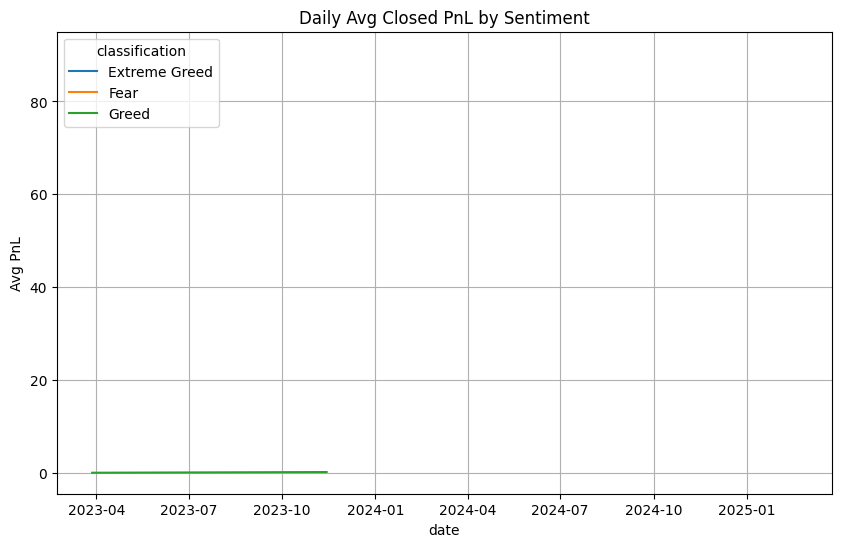

In [107]:
# Average PnL by date and sentiment
daily_pnl = merged_df.groupby(['date', 'classification'])['Closed PnL'].mean().unstack()
daily_pnl.plot(figsize=(10, 6))
plt.title("Daily Avg Closed PnL by Sentiment")
plt.ylabel("Avg PnL")
plt.grid(True)
plt.show()

In [109]:
# Save the updated DataFrame to a new CSV file
merged_df.to_csv('updated_merged_data.csv', index=False)
avg_pnl.to_csv("avg_pnl_by_sentiment.csv", index=False)